In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report


In [ ]:
import pandas as pd

In [3]:
heart_dataset = pd.read_csv(r"c:\Users\hp\Downloads\heart.csv")

In [4]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_dataset.shape

(303, 14)

In [6]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
x = heart_dataset.drop(columns=['target'],axis=1)
y = heart_dataset['target']

In [10]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(242, 13)

In [13]:
x_test.shape

(61, 13)

In [14]:
model = svm.SVC(kernel='linear')

In [15]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred=model.predict(x_test)

In [17]:
print(accuracy_score(y_test,y_pred))

0.8688524590163934


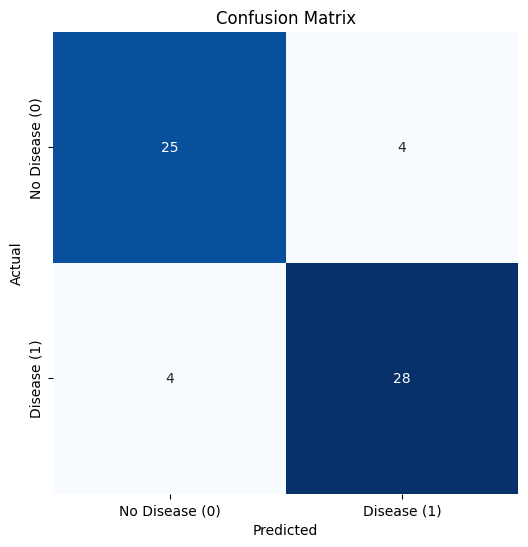

In [18]:
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(precision)
print(recall)

0.875
0.875


DecisionTreeClassifier

In [21]:
dt_model =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred_dt = dt_model.predict(x_test)

In [24]:
print(accuracy_score(y_test, y_pred_dt))

0.819672131147541


RandomForest

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_rf_pred = rf_model.predict(x_test)

In [27]:
print(accuracy_score(y_test, y_rf_pred))

0.8360655737704918


Logistic

In [28]:

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(x_train, y_train)

c:\Users\jyots\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:

y_lr_pred = log_reg_model.predict(x_test)

In [30]:
print(accuracy_score(y_test,y_lr_pred))

0.8852459016393442


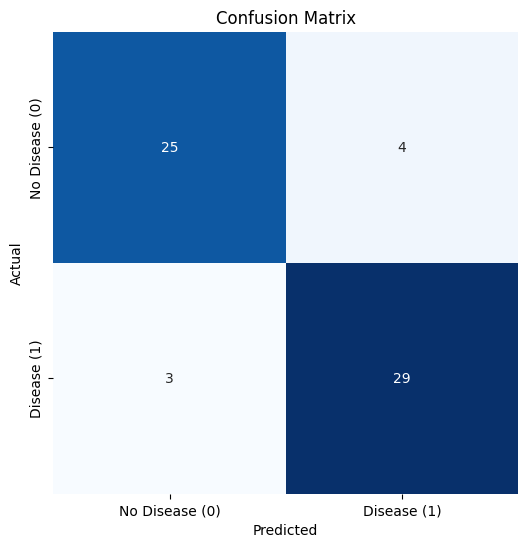

In [31]:
cm = confusion_matrix(y_test, y_lr_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
precision = precision_score(y_test, y_lr_pred)
recall = recall_score(y_test, y_lr_pred)
print(precision)
print(recall)

0.8787878787878788
0.90625


In [33]:
import pickle
filename = 'heart_model.sav'
pickle.dump(log_reg_model, open(filename,'wb'))